<a href="https://colab.research.google.com/github/kishore-lab/clustering/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("seed.csv")
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [0]:
data.info  ##no null values

<bound method DataFrame.info of          A      P       C     LK     WK  A_Coef    LKG  target
0    15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1    14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2    14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3    13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4    16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0
..     ...    ...     ...    ...    ...     ...    ...     ...
205  12.19  13.20  0.8783  5.137  2.981   3.631  4.870       2
206  11.23  12.88  0.8511  5.140  2.795   4.325  5.003       2
207  13.20  13.66  0.8883  5.236  3.232   8.315  5.056       2
208  11.84  13.21  0.8521  5.175  2.836   3.598  5.044       2
209  12.30  13.34  0.8684  5.243  2.974   5.637  5.063       2

[210 rows x 8 columns]>

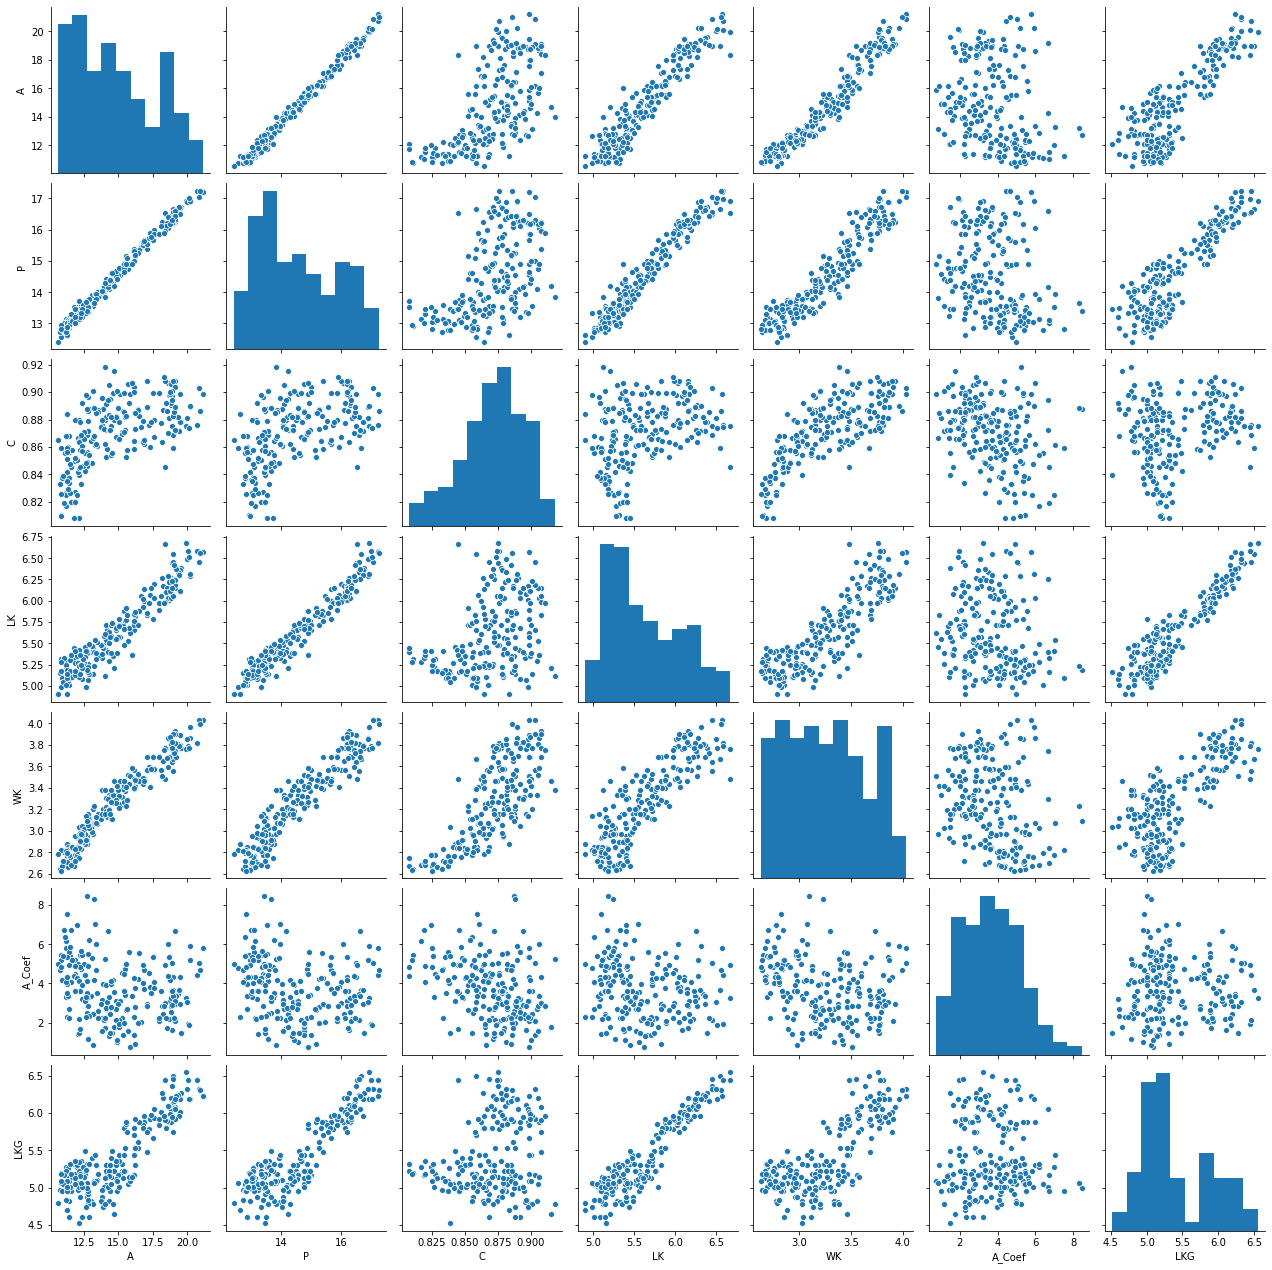

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

sns.pairplot(data.drop('target', axis=1))

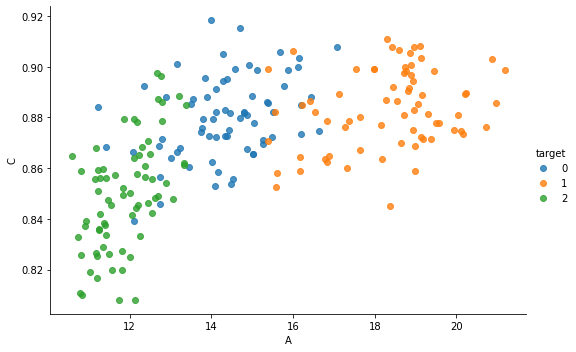

In [0]:
sns.lmplot(x='A', y='C', data=data, hue='target', aspect=1.5, fit_reg=False)

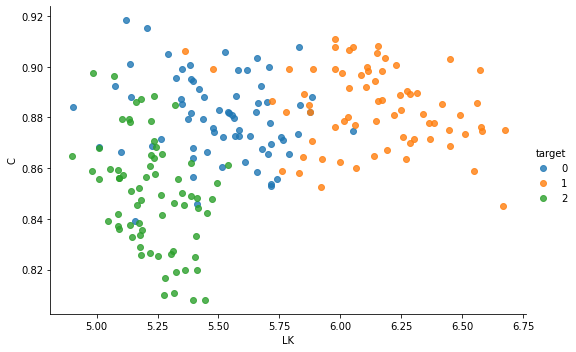

In [0]:
sns.lmplot(x='LK', y='C', data=data, hue='target', aspect=1.5, fit_reg=False)

In [0]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:7]
df.head(3)


,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


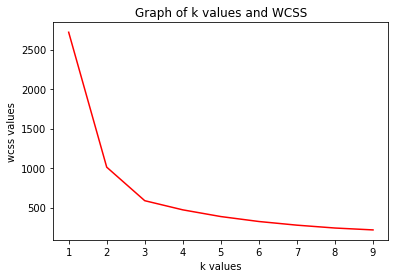

In [0]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()                     ##For k-means clustering algorithm;

##First of all I will find the best k value.
##Than I will use this k value to create a k-means model.
##And I will compare my original and k-means clustered datas.
#from this elbow curve we found  the 3 clusters

In [0]:
##KMeans Clustering algorithm ##building model
kmeans2=KMeans(n_clusters=3)
clusters=kmeans2.fit_predict(df)
df_k = df.copy(deep=True)
df_k['label'] = clusters


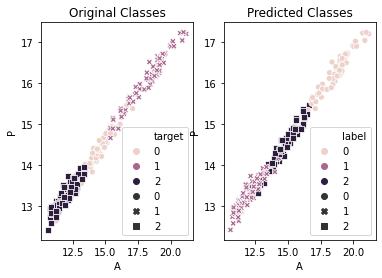

In [0]:
#Comparing Original Classes and K-Means Algorithm Classes:

#For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [0]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Predicted Data Classes:
1    77
2    72
0    61
Name: label, dtype: int64


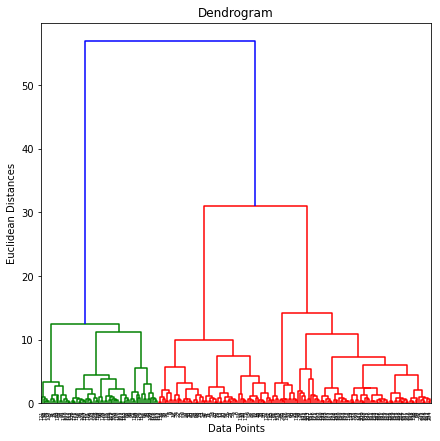

In [0]:
#HIERARICHAL CLUSTERING
#DENDOGRAM REPRESENTATION
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize=[7,7])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()                            ## understood 3 classes or clusters from this digram

In [0]:
from sklearn.cluster import AgglomerativeClustering 
hc=AgglomerativeClustering(n_clusters=3,affinity= 'euclidean',linkage='ward')
clusters2=hc.fit_predict(df)
df_h = df.copy(deep=True)
df_h['label'] = clusters2

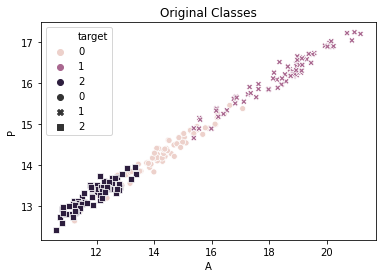

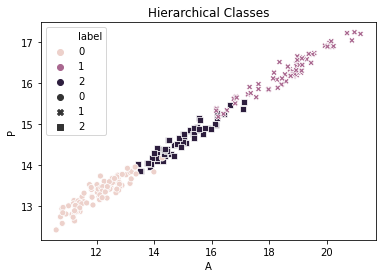

In [0]:
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data)
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_h)
plt.show()

In [0]:

print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)

print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    86
1    63
2    61
Name: label, dtype: int64


In [0]:
km = KMeans(n_clusters=3, random_state=42)
km_pred = km.fit_predict(data.drop('target', axis=1))
km_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [0]:
np.array(data['target'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
  ##accuracy of KMmeans clustering 
  print('Accuracy of KMmeans clustering : ' + str(round(sum(km_pred == data['target']) / data.shape[0] * 100, 2)) + '%')

Accuracy of KMmeans clustering : 89.52%


In [0]:
km2 = AgglomerativeClustering(n_clusters=3)
km_pred1 = km2.fit_predict(data.drop('target', axis=1))
km_pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
##accuracy of KMmeans clustering 
  print('Accuracy of  agglomerative clustering : ' + str(round(sum(km_pred1 == data['target']) / data.shape[0] * 100, 2)) + '%')

Accuracy of  agglomerative clustering : 37.62%


In [0]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=500, n_clusters=3 , threshold=1.5)
brc.fit(df)


Birch(branching_factor=500, compute_labels=True, copy=True, n_clusters=3,
      threshold=1.5)

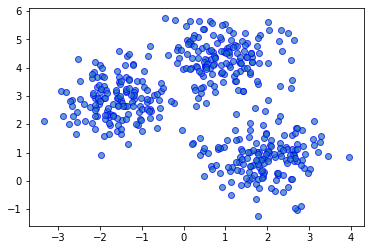

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch
X, clusters = make_blobs(n_samples=450, centers=3, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [0]:
brc = Birch(branching_factor=50, n_clusters=3, threshold=1.5)
brc.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=4,
      threshold=1.5)

In [0]:
labels = brc.predict(X)

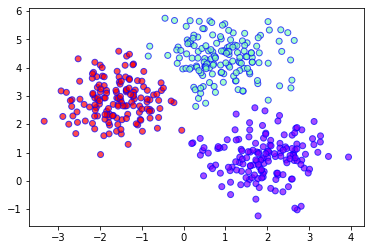

In [0]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7,edgecolors='b')